EDA
---

In [1]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('dark_background')



data_path = './data/'

In [2]:
data_files = os.listdir(data_path)
data_files[:5]

['ISS.OEM_J2K_EPH-1-03.xml',
 'ISS.OEM_J2K_EPH-1-31.xml',
 'ISS.OEM_J2K_EPH-10-16-21.xml',
 'ISS.OEM_J2K_EPH-10-4-21.xml',
 'ISS.OEM_J2K_EPH-11-02-21.xml']

In [3]:
#concatenates all the data in a folder into a single dataframe.
def merge_data(data_folder_path, xpath = './/stateVector'):
    dfs = []
    data_files = os.listdir(data_folder_path)
    for file in data_files:
        dfs.append(pd.read_xml(data_folder_path + file, xpath = xpath))
    new_df = pd.concat(dfs)
    return new_df

In [4]:
df = merge_data(data_path)

In [5]:
#change EPOCH to datetime
date_format = '%Y-%jT%H:%M:%S.%fZ'
df['EPOCH'] = pd.to_datetime(df['EPOCH'], format = date_format)

In [6]:
earliest = df['EPOCH'].min()
latest = df['EPOCH'].max()
earliest, latest

(Timestamp('2021-08-13 12:40:19.983000'), Timestamp('2022-03-05 12:00:00'))

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93220 entries, 0 to 5665
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   EPOCH   93220 non-null  datetime64[ns]
 1   X       93220 non-null  float64       
 2   Y       93220 non-null  float64       
 3   Z       93220 non-null  float64       
 4   X_DOT   93220 non-null  float64       
 5   Y_DOT   93220 non-null  float64       
 6   Z_DOT   93220 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 5.7 MB


In [8]:
df.drop_duplicates(keep = 'first', ignore_index = True)

EPOCH            X            Y            Z     X_DOT  \
0     2022-01-03 12:00:00 -1325.896392  5492.890956  3762.423748 -4.874701   
1     2022-01-03 12:04:00 -2433.281488  4320.159983  4635.900477 -4.297149   
2     2022-01-03 12:08:00 -3363.479005  2832.811037  5170.828406 -3.407241   
3     2022-01-03 12:12:00 -4048.928392  1139.313496  5328.425368 -2.270061   
4     2022-01-03 12:16:00 -4439.907075  -637.051221  5097.390987 -0.968255   
...                   ...          ...          ...          ...       ...   
93215 2022-03-05 11:44:00 -1617.172634  5811.915098 -3138.747925 -5.825532   
93216 2022-03-05 11:48:00 -2939.654841  5839.158105 -1871.522606 -5.127851   
93217 2022-03-05 11:52:00 -4048.592064  5442.251213  -467.971380 -4.056746   
93218 2022-03-05 11:56:00 -4863.172342  4649.677332   969.689743 -2.689878   
93219 2022-03-05 12:00:00 -5324.017021  3518.907107  2336.610218 -1.127040   

          Y_DOT     Z_DOT  
0     -4.102517  4.264288  
1     -5.610270  2.970223  
2     -6.708421  1.460389  
3     -7.317825 -0.154980  
4     -7.394847 -1.758465  
...         ...       ...  
93215  1.004555  4.863254  
93216 -0.779273  5.632571  
93217 -2.508369  5.992176  
93218 -4.056206  5.914975  
93219 -5.309342  5.406270  

[93220 rows x 7 columns]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93220 entries, 0 to 5665
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   EPOCH   93220 non-null  datetime64[ns]
 1   X       93220 non-null  float64       
 2   Y       93220 non-null  float64       
 3   Z       93220 non-null  float64       
 4   X_DOT   93220 non-null  float64       
 5   Y_DOT   93220 non-null  float64       
 6   Z_DOT   93220 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 5.7 MB


In [10]:
#about 19 observations an hour
60*60*len(df)/(df['EPOCH'].max()-df['EPOCH'].min()).total_seconds()

19.042647222367073

In [11]:
df.head()

EPOCH            X            Y            Z     X_DOT  \
0 2022-01-03 12:00:00 -1325.896392  5492.890956  3762.423748 -4.874701   
1 2022-01-03 12:04:00 -2433.281488  4320.159983  4635.900477 -4.297149   
2 2022-01-03 12:08:00 -3363.479005  2832.811037  5170.828406 -3.407241   
3 2022-01-03 12:12:00 -4048.928392  1139.313496  5328.425368 -2.270061   
4 2022-01-03 12:16:00 -4439.907075  -637.051221  5097.390987 -0.968255   

      Y_DOT     Z_DOT  
0 -4.102517  4.264288  
1 -5.610270  2.970223  
2 -6.708421  1.460389  
3 -7.317825 -0.154980  
4 -7.394847 -1.758465

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93220 entries, 0 to 5665
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   EPOCH   93220 non-null  datetime64[ns]
 1   X       93220 non-null  float64       
 2   Y       93220 non-null  float64       
 3   Z       93220 non-null  float64       
 4   X_DOT   93220 non-null  float64       
 5   Y_DOT   93220 non-null  float64       
 6   Z_DOT   93220 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 5.7 MB


In [13]:
# x,y,z appear to be positions in kilometers (earth is ~6400 km radius)
# dot values are speeds in km/s (LEO is about 7.8 km/s)
df.describe()

X             Y             Z         X_DOT         Y_DOT  \
count  93220.000000  93220.000000  93220.000000  93220.000000  93220.000000   
mean     -48.953212     27.083878    -42.860906     -0.031717     -0.039419   
std     4118.285464   3866.906236   3778.816541      4.660224      4.360506   
min    -6801.159311  -6799.330442  -5343.884465     -7.664345     -7.662875   
25%    -3939.895774  -3638.947533  -3838.161120     -4.454389     -4.134318   
50%     -110.630868     55.123831    -80.090151     -0.050207     -0.095268   
75%     3859.948685   3703.984205   3756.158386      4.379124      4.080735   
max     6799.921948   6800.363972   5331.742825      7.665250      7.668339   

              Z_DOT  
count  93220.000000  
mean       0.034857  
std        4.232699  
min       -6.019382  
25%       -4.194822  
50%        0.095839  
75%        4.224204  
max        6.022161

### speed

In [14]:
df['speed'] = df.apply(lambda row: np.linalg.norm([row['X_DOT'],row['Y_DOT'],row['Z_DOT']]), axis = 1)

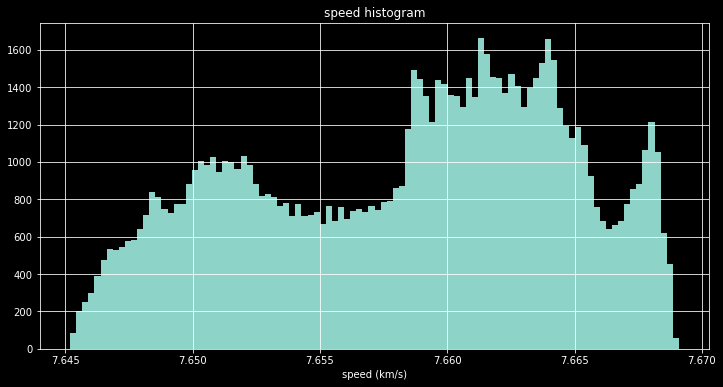

In [15]:
df['speed'].hist(bins = 100, figsize = (12,6))
plt.xlabel("speed (km/s)")
plt.title('speed histogram');

### distance from earth center

In [16]:
df['radius'] = df.apply(lambda row: np.linalg.norm([row['X'],row['Y'],row['Z']]), axis = 1)

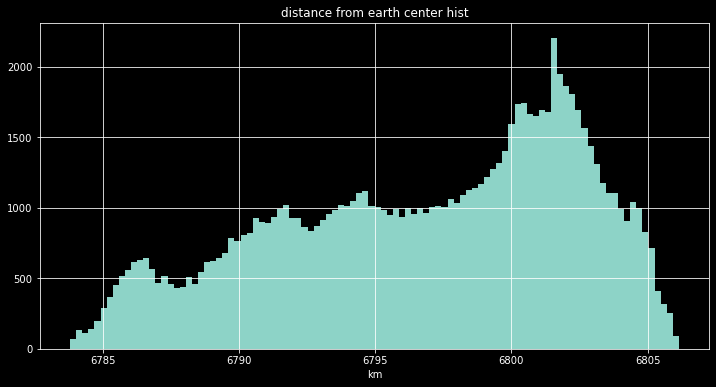

In [17]:
df.radius.hist(bins = 100, figsize = (12,6))
plt.title('distance from earth center hist')
plt.xlabel("km");

<AxesSubplot:xlabel='X', ylabel='Z'>

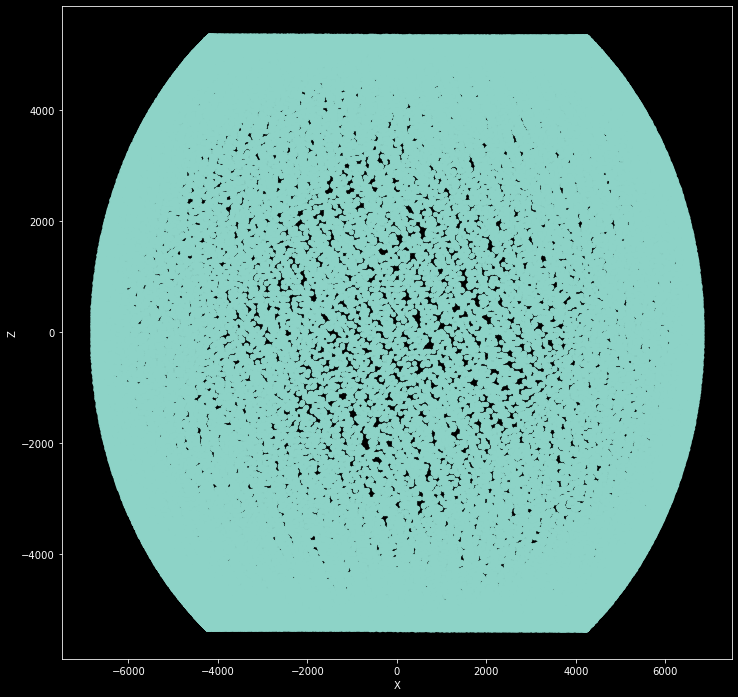

In [18]:
df.plot.scatter('X', "Z", figsize = (12,12), )

<AxesSubplot:xlabel='X_DOT', ylabel='Z_DOT'>

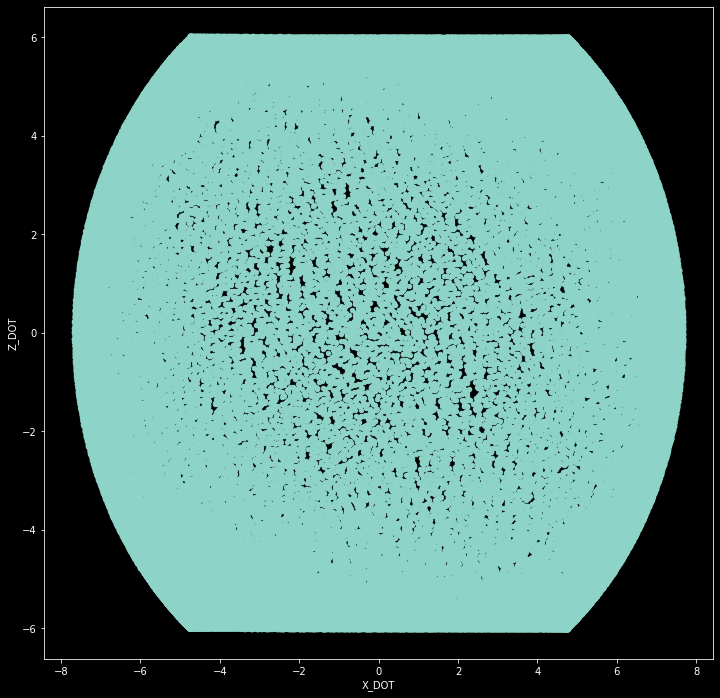

In [19]:
df.plot.scatter('X_DOT', "Z_DOT", figsize = (12,12), )

In [20]:
# convert to angles, latlon
df['azi'] = df.apply(lambda row: np.arctan(row['Y']/row['X']), axis = 1)
df['pol'] = df.apply(lambda row: np.arctan(row['Z']/6400), axis = 1)

Text(0.5, 1.0, 'longitude hist')

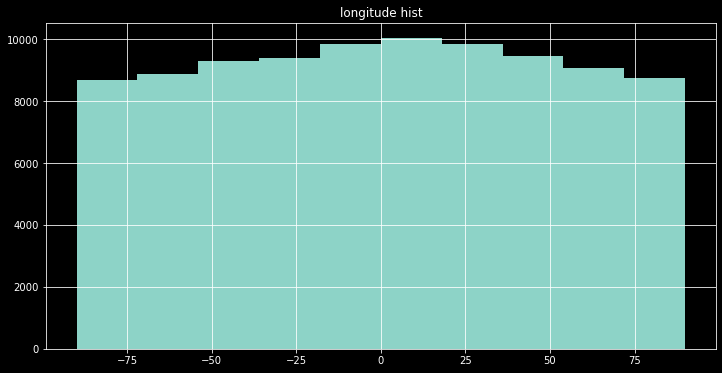

In [21]:
df['lon'] = df['azi']*180/np.pi
df['lon'].hist(figsize = (12,6))
plt.title("longitude hist")

Text(0.5, 1.0, 'latitude hist')

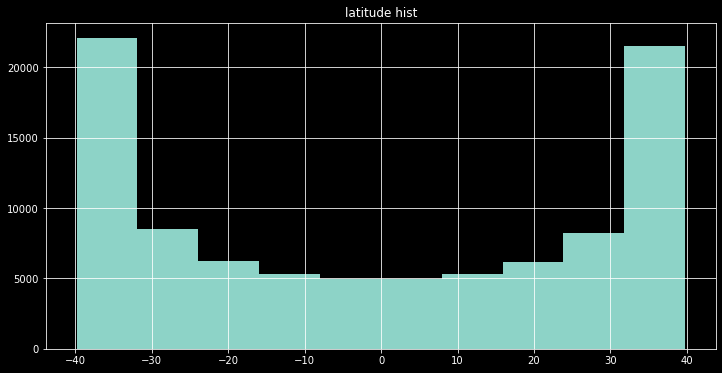

In [22]:
df['lat'] = df['pol']*180/np.pi
df['lat'].hist(figsize = (12,6))
plt.title("latitude hist")

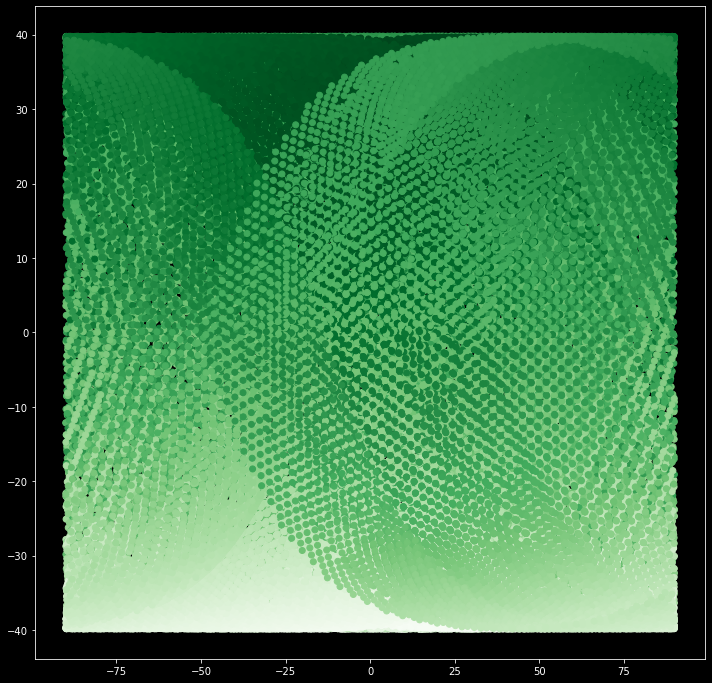

In [23]:
#plot speed(color) with latlon
plt.figure(figsize = (12,12))
plt.scatter(df['lon'], df['lat'], c = df['speed'], cmap = "Greens")

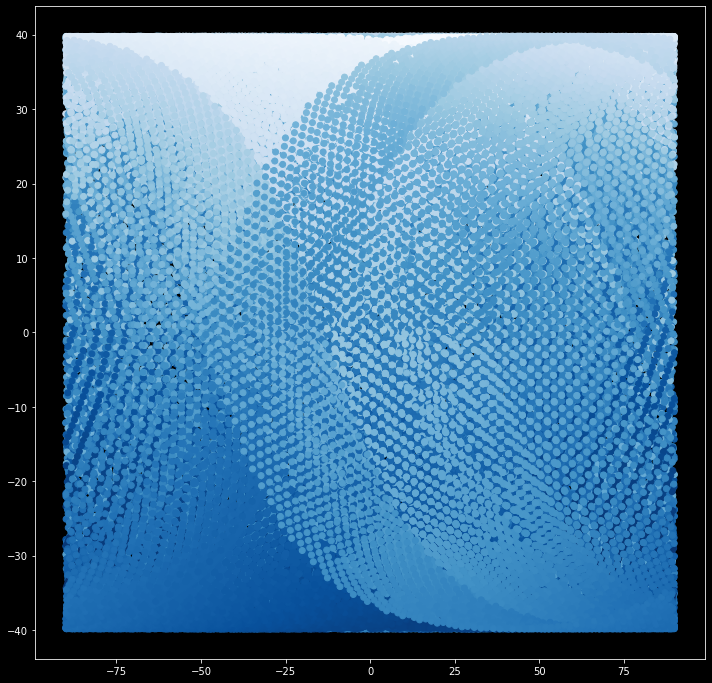

In [24]:
#plot orbital distance from center (color) with latlon
plt.figure(figsize = (12,12))
plt.scatter(df['lon'], df['lat'], c = df['radius'], cmap = "Blues")

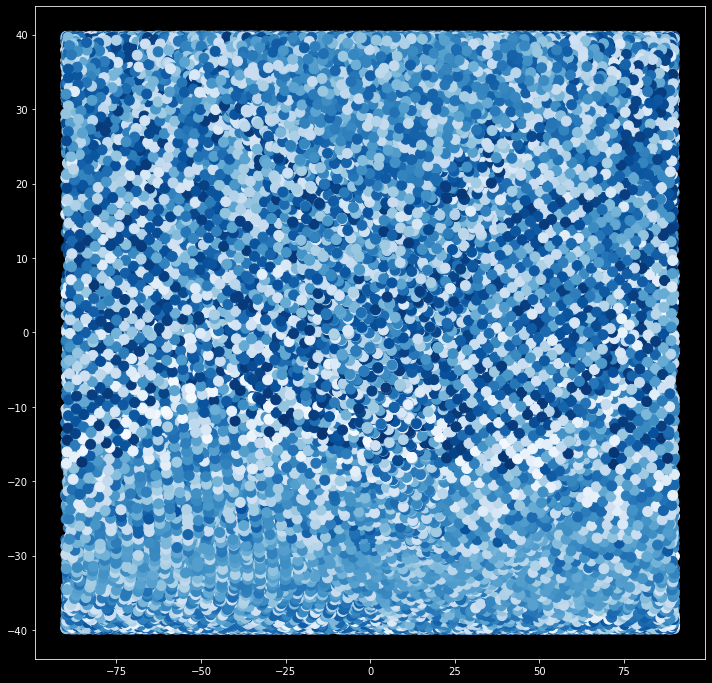

In [25]:
#plot speed (color) with lat/lon (averaged)
plt.figure(figsize = (12,12))
plt.scatter(df.groupby(by = ['speed']).mean()['lon'],df.groupby(by = ['speed']).mean()['lat'], c = df['speed'], cmap = "Blues", marker='o', s = 100)

In [26]:
#can we perform a diff to get acceleration?

In [27]:
df['speed_diffs'] = df['speed'].diff()

Text(0.5, 1.0, 'speed diff()')

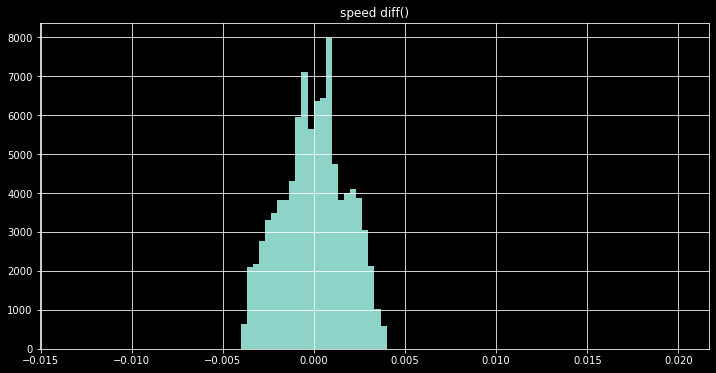

In [28]:
#speed diffs
df['speed_diffs'].hist(bins = 100, figsize = (12,6))
plt.title("speed diff()")

The data are approximately evenly spaced, but there is an orbit there the station was tracked very precisely (look at -50 lon, -30 lat). This is likely what's causing the spike at 0. I'd be interested if the biggest spike at around 0.001 was from station keeping events.

<AxesSubplot:title={'center':'speed diffs (1H resample)'}, xlabel='EPOCH'>

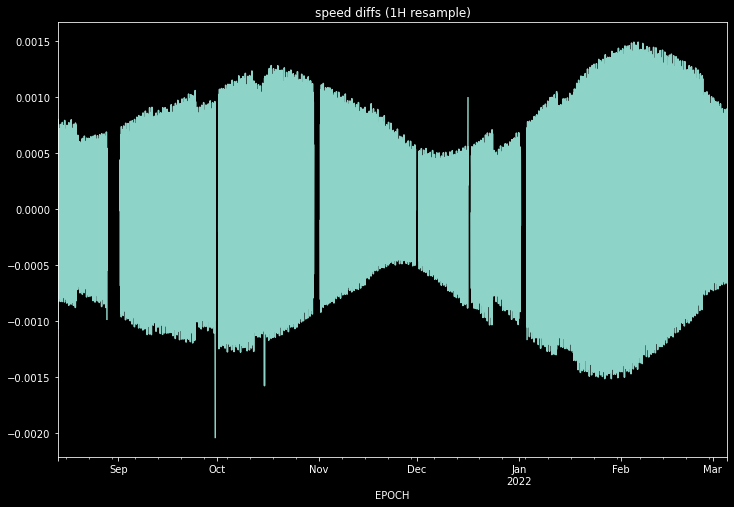

In [29]:
df.resample(rule = '1H', on = 'EPOCH').mean()['speed_diffs'].plot(figsize = (12,8), title = "speed diffs (1H resample)")

<AxesSubplot:title={'center':'speeds (1 H resample)'}, xlabel='EPOCH'>

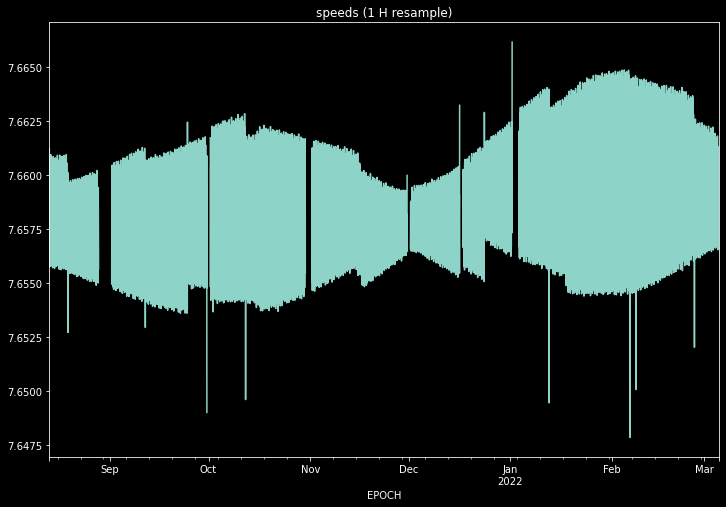

In [30]:
df.resample(rule = "1H", on = 'EPOCH').mean()['speed'].plot(figsize = (12,8), title = "speeds (1 H resample)")

In [31]:
df['time_diffs'] = df['EPOCH'].diff().apply(lambda time: time.total_seconds())

Text(0.5, 0, 'seconds')

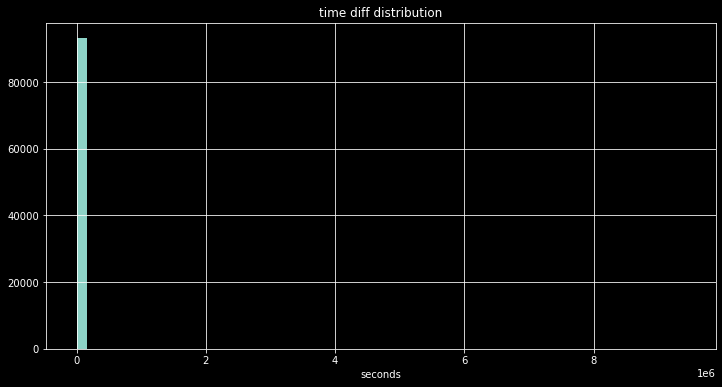

In [32]:
df[df['time_diffs']>-10]['time_diffs'].dropna().hist(bins = 60, figsize=(12,6))
plt.title('time diff distribution')
plt.xlabel("seconds")

These are mostly 2 minutes apart. There are a few at 0, and at least one very large negative value. This 0 number could also be contributing to the 0 speed diffs.

In [33]:
1000*0.001/240 # 1000 m/km * 0.001 speed diff peak / 240 seconds per diff

0.004166666666666667

Could this be station-keeping? What acceleration do the thrusters give? We could look this up by looking up the station keeping events.

Acceleration should be made more rigorously. It could also be given as a vector (XYZ or, radially, which would cover gravity)

accelerations to account for:

- station-keeping events
- rendezvous and docking events
- atmospheric drag (data comments include info on this)
- change in acceleration due to gravity based on radius

In [34]:
df

EPOCH            X            Y            Z     X_DOT  \
0    2022-01-03 12:00:00 -1325.896392  5492.890956  3762.423748 -4.874701   
1    2022-01-03 12:04:00 -2433.281488  4320.159983  4635.900477 -4.297149   
2    2022-01-03 12:08:00 -3363.479005  2832.811037  5170.828406 -3.407241   
3    2022-01-03 12:12:00 -4048.928392  1139.313496  5328.425368 -2.270061   
4    2022-01-03 12:16:00 -4439.907075  -637.051221  5097.390987 -0.968255   
...                  ...          ...          ...          ...       ...   
5661 2022-03-05 11:44:00 -1617.172634  5811.915098 -3138.747925 -5.825532   
5662 2022-03-05 11:48:00 -2939.654841  5839.158105 -1871.522606 -5.127851   
5663 2022-03-05 11:52:00 -4048.592064  5442.251213  -467.971380 -4.056746   
5664 2022-03-05 11:56:00 -4863.172342  4649.677332   969.689743 -2.689878   
5665 2022-03-05 12:00:00 -5324.017021  3518.907107  2336.610218 -1.127040   

         Y_DOT     Z_DOT     speed       radius       azi       pol  \
0    -4.102517  4.264288  7.666649  6788.643808 -1.333943  0.531459   
1    -5.610270  2.970223  7.665693  6787.946252 -1.057846  0.626888   
2    -6.708421  1.460389  7.664524  6787.877120 -0.699964  0.679565   
3    -7.317825 -0.154980  7.663404  6788.517752 -0.274294  0.694286   
4    -7.394847 -1.758465  7.662472  6789.845651  0.142510  0.672583   
...        ...       ...       ...          ...       ...       ...   
5661  1.004555  4.863254  7.654880  6800.392855 -1.299410 -0.455962   
5662 -0.779273  5.632571  7.656891  6799.995207 -1.104402 -0.284493   
5663 -2.508369  5.992176  7.658674  6799.131796 -0.931199 -0.072991   
5664 -4.056206  5.914975  7.659972  6797.811613 -0.762959  0.150370   
5665 -5.309342  5.406270  7.660750  6796.146833 -0.584034  0.350059   

            lon        lat  speed_diffs  time_diffs  
0    -76.429308  30.450364          NaN         NaN  
1    -60.610103  35.918048    -0.000957       240.0  
2    -40.104970  38.936198    -0.001169       240.0  
3    -15.715881  39.779630    -0.001121       240.0  
4      8.165241  38.536177    -0.000932       240.0  
...         ...        ...          ...         ...  
5661 -74.450707 -26.124688     0.001831       240.0  
5662 -63.277573 -16.300261     0.002010       240.0  
5663 -53.353754  -4.182055     0.001783       240.0  
5664 -43.714338   8.615585     0.001299       240.0  
5665 -33.462695  20.056903     0.000778       240.0  

[93220 rows x 15 columns]

<AxesSubplot:>

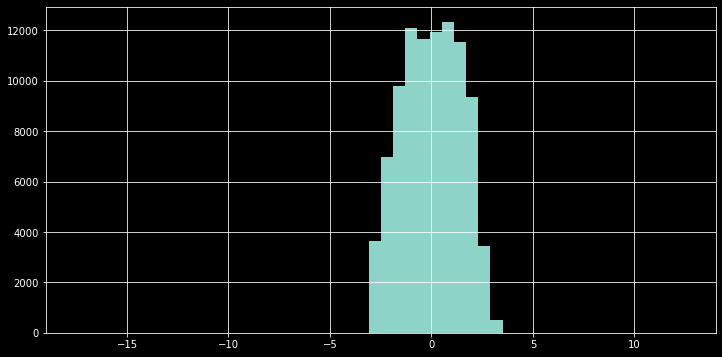

In [35]:
df['rad_diffs'] = df['radius'].diff()
df['rad_diffs'].hist(bins = 50,figsize = (12,6))

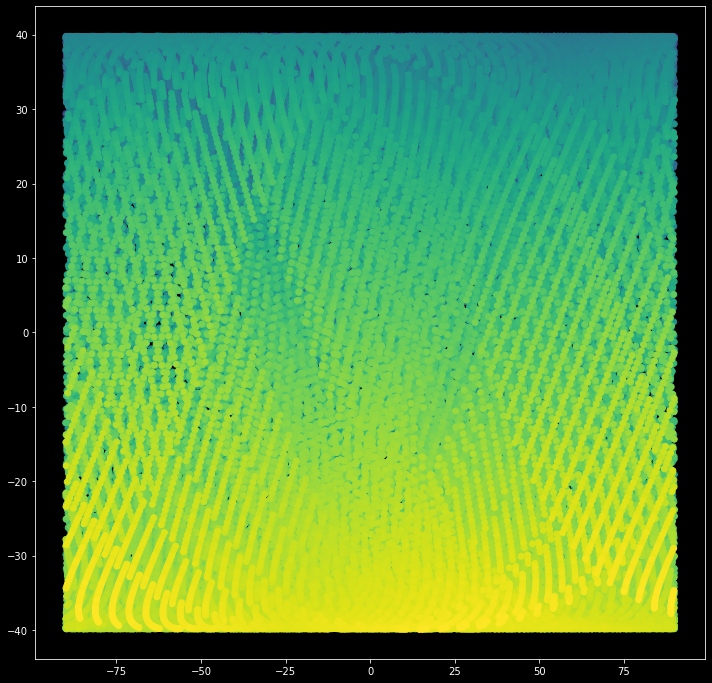

In [36]:
dfrad = df.groupby(by = 'radius').mean()
plt.figure(figsize = (12,12))
plt.scatter(dfrad['lon'], dfrad['lat'], c = dfrad.index)

In [37]:
df['lat_round'] = df['lat'].apply(lambda this_lat: round(this_lat, 0))
df['lon_round'] = df['lon'].apply(lambda this_lon: round(this_lon, 0))

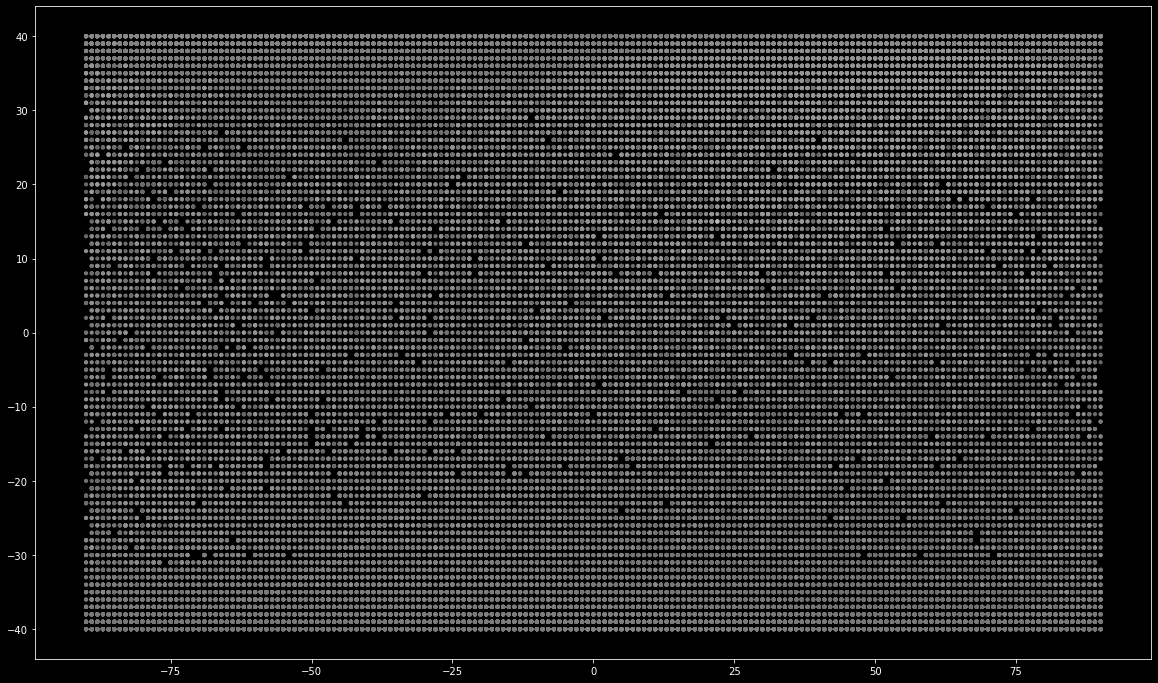

In [38]:
plt.figure(figsize = (20,12))
plt.scatter(df['lon_round'], df['lat_round'], c = df['rad_diffs'], cmap = 'Greys', s = 10)

The coordinates are in EME2000 / J2000 / ICRF, which are fixed on the celestial plane.

[ICRF / EME2000](https://naif.jpl.nasa.gov/pub/naif/toolkit_docs/Tutorials/pdf/individual_docs/04_concepts.pdf)

[Celestial Reference Frame](https://ggos.org/item/celestial-reference-frame/)

The ICRF has x on the intersection of the ecliptic and earth mean equatorial plane and z perpendicular to the mean equatorial plane. (and so y also on the plane).

This means that these locations aren't exactly latitude and longitude. Latitude will shift slightly as the Earth wobbles. More importantly, the longitudes will be scattered around their entire range depending on the current point of rotation of the Earth.

Using the time of day may not be good enough, as the Earth experiences a leap year every 4 years, shifting the rotation relative to the time of day. (Does this actually affect it, though?) It might be best to track the rotation of Earth's longitude by Epoch time, as in, number of seconds.

Just adjusting by the length of a day might not be good enough either. If the period used here is a little different than that period of rotation, it will smear the result over the year. The width of that smear will depend on how far the used value is from the true value.


### true day length
The length of a day on the surface of the earth, relative to the sun, [is almost exactly 24 hours](https://www.timeanddate.com/time/earth-rotation.html). This is a bit longer, [by three minutes fifty-six seconds](https://en.wikipedia.org/wiki/Earth%27s_rotation), for the Earth to make a complete rotation. It has to rotate this extra time to account for the motion along its orbit. These extra minutes should be about 1/365 of a day:

In [69]:
'{:.2f}'.format(86400/(60*3 + 56.715))   # num seconds in a day over number seconds in this extra time.

'365.00'

I rounded 56 seconds to 56.7 to make it look nice. Don't get all persnickety about it, please.

In [135]:
#getting total seconds since beginning
df['seconds'] = df['EPOCH'].apply(lambda this_timedelta: (this_timedelta-earliest).total_seconds())
df['seconds'].head()

0      0.0
1    240.0
2    480.0
3    720.0
4    960.0
Name: seconds, dtype: float64

In [133]:
#reorder by seconds elapsed
df.sort_values(by='seconds', inplace = True)
df.head()

EPOCH            X            Y            Z     X_DOT  \
0 2021-08-13 12:40:19.983 -4188.917052  1060.451826  5240.374217 -3.137317   
1 2021-08-13 12:44:19.983 -4780.617186  -614.185177  4786.777189 -1.763380   
2 2021-08-13 12:48:19.983 -5025.016503 -2244.186176  3984.441448 -0.260732   
3 2021-08-13 12:52:19.983 -4904.188295 -3711.056159  2891.689879  1.261602   
4 2021-08-13 12:56:19.983 -4426.768983 -4908.074484  1588.091105  2.692637   

      Y_DOT     Z_DOT     speed       radius       azi       pol        lon  \
0 -6.900952 -1.108280  7.661213  6792.135605 -0.247947  0.686105 -14.206335   
1 -6.969268 -2.648663  7.661307  6792.993447  0.127774  0.642178   7.320917   
2 -6.531178 -3.996676  7.661441  6794.331174  0.420025  0.556849  24.065670   
3 -5.618073 -5.053926  7.661367  6795.945189  0.647783  0.424372  37.115215   
4 -4.296159 -5.742906  7.660826  6797.610766  0.836913  0.243227  47.951563   

         lat  speed_diffs    time_diffs  rad_diffs  lat_round  lon_round  \
0  39.310907    -0.004940 -1.217998e+07   1.902177       39.0      -14.0   
1  36.794061     0.000094  2.400000e+02   0.857842       37.0        7.0   
2  31.905112     0.000134  2.400000e+02   1.337727       32.0       24.0   
3  24.314716    -0.000074  2.400000e+02   1.614015       24.0       37.0   
4  13.935857    -0.000542  2.400000e+02   1.665577       14.0       48.0   

   seconds  
0      0.0  
1    240.0  
2    480.0  
3    720.0  
4    960.0

In [219]:
# get the number of seconds modulo a day of rotation (23 hours, 56 minutes, 4 seconds)

seconds_1_rotation = ((23*60+56)*60+4)

df['sec_mod_rot'] = df['seconds']%seconds_1_rotation

<AxesSubplot:>

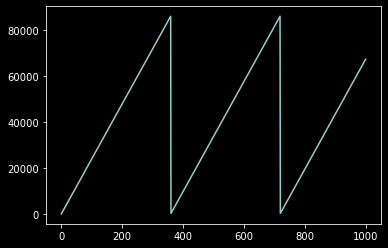

In [144]:
#check that it worked
df['sec_mod_rot'].iloc[:1000].plot()

In [154]:
df['sec_mod_rot'].max(), df['sec_mod_rot'].min()

(86162.80099999905, 0.0)

<AxesSubplot:>

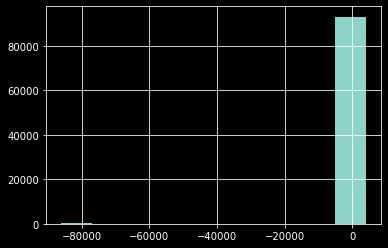

In [203]:
df['sec_mod_rot'].hist()

In [205]:
(df['sec_mod_rot'].diff() > -100) & (df['sec_mod_rot'].diff() < 500)


0       False
1        True
2        True
3        True
4        True
        ...  
5661     True
5662     True
5663     True
5664     True
5665     True
Name: sec_mod_rot, Length: 93220, dtype: bool

In [211]:
# make a column to just get the sec_mod_rots in the typical range
df['sec_diff'] = df['seconds'].diff()
df['sec_diff_is_mid'] = (df['seconds'].diff() > -100) & (df['seconds'].diff() < 500)

In [213]:
df.loc[df['sec_diff_is_mid'],'sec_diff'].describe()

count    93213.000000
mean       178.890777
std         97.692750
min          0.000000
25%         99.000000
50%        240.000000
75%        240.000000
max        240.000000
Name: sec_diff, dtype: float64

In [220]:
#convert this to an angle of earth rotation
df['earth_phase'] = np.pi*2*df['sec_mod_rot']/seconds_1_rotation

<AxesSubplot:>

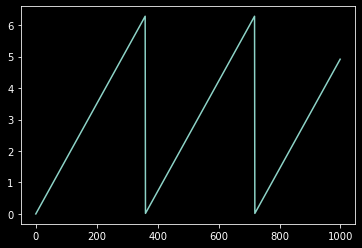

In [224]:
#plot earth phases. to make sure it looks good
df.iloc[:1000].earth_phase.plot()


In [227]:
#make earth-fixed x and y coordinates. X and Y have to rotate counterclockwise, along with the earth.
df['X_earth'] = df.apply(lambda row: row['X']*np.cos(row['earth_phase']) - row['Y']*np.sin(row['earth_phase']) , axis = 1)
df['Y_earth'] = df.apply(lambda row: row['X']*np.sin(row['earth_phase']) + row['Y']*np.cos(row['earth_phase']) , axis = 1)

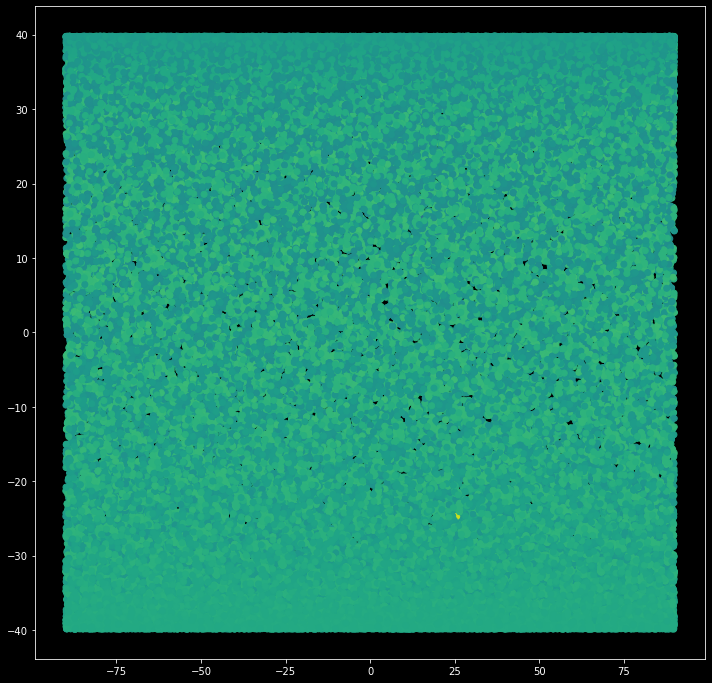

In [234]:
# convert to azi
df['azi_earth'] = df.apply(lambda row: np.arctan(row['Y_earth']/row['X_earth']), axis = 1)
df['lon_earth'] = df['azi_earth']*180/np.pi

plt.figure(figsize = (12,12))
plt.scatter(df['lon_earth'], df['lat'], c = df['rad_diffs'])

In [270]:
df_rounded = df.groupby(by = ['lon_round', 'lat_round']).mean()
df_rounded['lat'] = df_rounded.index.to_frame()['lat_round']
df_rounded['lon'] = df_rounded.index.to_frame()['lon_round']

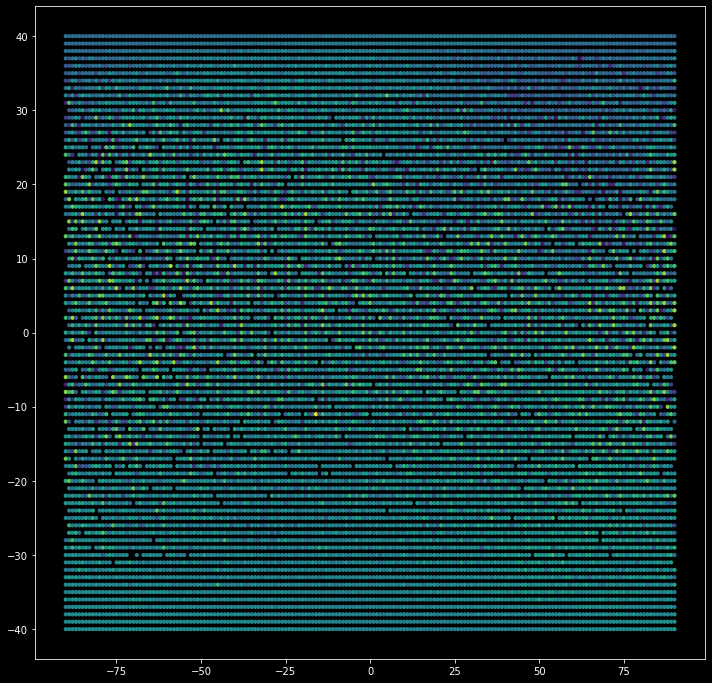

In [271]:
#plot rad_differences with earth centered lat and lon
plt.figure(figsize = (12,12))
plt.scatter(df_rounded['lon'], df_rounded['lat'], c = df_rounded['rad_diffs'], s = 10)

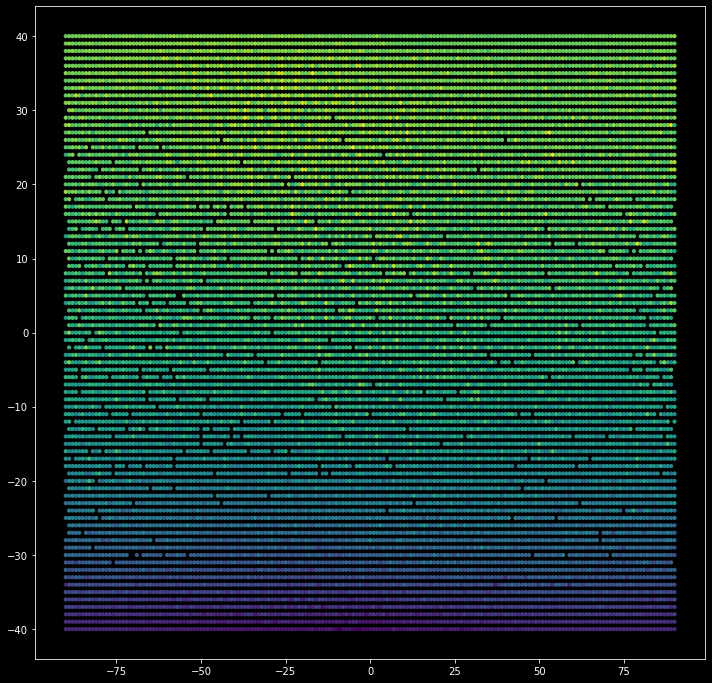

In [266]:
#plot speed with earth centered lat and lon
plt.figure(figsize = (12,12))
plt.scatter(df_rounded['lon'], df_rounded['lat'], c = df_rounded['speed'], s = 10)

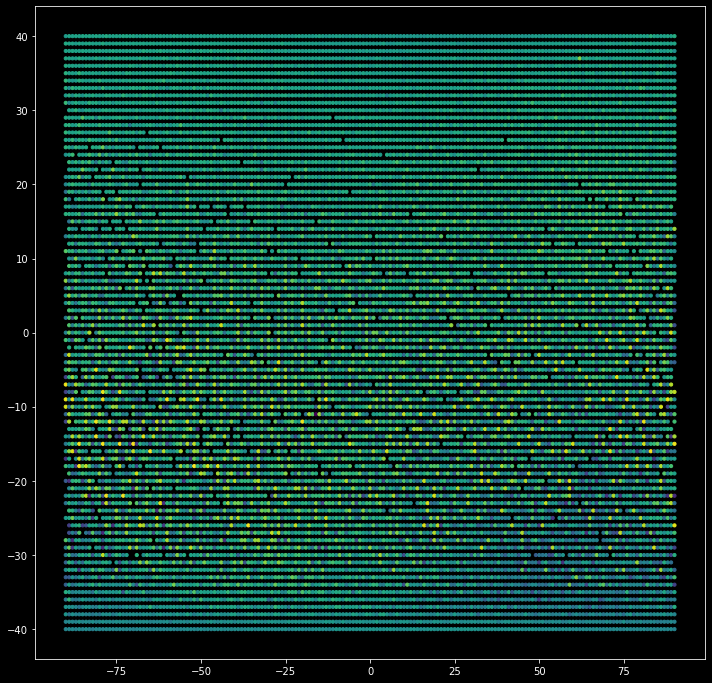

In [267]:
#plot speed_differences with earth centered lat and lon
plt.figure(figsize = (12,12))
plt.scatter(df_rounded['lon'], df_rounded['lat'], c = df_rounded['speed_diffs'], s = 10)